Imports for use below

In [279]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [280]:
pd.options.display.max_columns=500
pd.options.display.max_rows=100000

In [281]:
df=pd.read_csv('./Data/model_csv.csv',index_col='Unnamed: 0')

In [282]:
df.head()

,id,name_x,neighbourhood_x,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neg,neu,pos,compound,price,room_type_x_Private room,room_type_x_Shared room,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_33%,host_response_rate_40%,host_response_rate_42%,host_response_rate_43%,host_response_rate_47%,host_response_rate_50%,host_response_rate_54%,host_response_rate_56%,host_response_rate_57%,host_response_rate_58%,host_response_rate_60%,host_response_rate_63%,host_response_rate_64%,host_response_rate_67%,host_response_rate_69%,host_response_rate_70%,host_response_rate_71%,host_response_rate_73%,host_response_rate_75%,host_response_rate_77%,host_response_rate_78%,host_response_rate_79%,host_response_rate_80%,host_response_rate_81%,host_response_rate_82%,host_response_rate_83%,host_response_rate_84%,host_response_rate_85%,host_response_rate_86%,host_response_rate_87%,host_response_rate_88%,host_response_rate_89%,host_response_rate_90%,host_response_rate_91%,host_response_rate_92%,host_response_rate_93%,host_response_rate_94%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_rate_98%,host_response_rate_99%,host_is_superhost_f,host_is_superhost_t,host_neighbourhood_Battersea,host_neighbourhood_Bethnal Green,host_neighbourhood_Bruntsfield,host_neighbourhood_Cannonmills,host_neighbourhood_Covent Garden,host_neighbourhood_Duboce Triangle,host_neighbourhood_Earls Court,host_neighbourhood_Hampstead,host_neighbourhood_Haymarket,host_neighbourhood_Holland Park,host_neighbourhood_LB of Barnet,host_neighbourhood_LB of Bromley,host_neighbourhood_LB of Islington,host_neighbourhood_LB of Merton,host_neighbourhood_La Pointe-Rouge,host_neighbourhood_Leith,host_neighbourhood_Lučac-Manuš,host_neighbourhood_Manly,host_neighbourhood_Marchmont,host_neighbourhood_Mayfair,host_neighbourhood_Morningside,host_neighbourhood_Mountain View,host_neighbourhood_New Town,host_neighbourhood_Newington,host_neighbourhood_North City Central/O'Connell Street,host_neighbourhood_Notting Hill,host_neighbourhood_Old Town,host_neighbourhood_Palos do Moguer,host_neighbourhood_Poblados Marítimos,host_neighbourhood_Shoreditch,host_neighbourhood_Southside,host_neighbourhood_St. Luke's,host_neighbourhood_Stockbridge,host_neighbourhood_Tollcross,host_neighbourhood_Vauxhall,host_neighbourhood_West End,host_neighbourhood_Älvsjö,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,"amenities_{""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Hot tub"",Heating,Washer,""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials,Shampoo,Hangers,Iron,""Laptop friendly workspace"",""Private entrance""}","amenities_{""Air conditioning"",Kitchen,""Free street parking"",""Family/kid friendly"",""Suitable for events"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""Private entrance"",""Dishes and silverware"",Stove,""Long term stays allowed"",""Host greets you""}","amenities_{""Air conditioning"",Kitchen,""Pets allowed"",""Family/kid friendly"",""Suitable for events"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""Private entrance"",""Dishes and silverware"",Stove,""Long term stays allowe

The new data frame with all dummy variables is being imported to be train test split. All dummied categorical variables and numeric variables are going to be used. This will be run through a series of train test splits in order to ensure that model can be tested and evlauated. LCV and RCV will be used to zero and show which coefficients are best to disregard.

In [283]:
# set X and y for train test split

In [284]:
X=df.drop(columns=['id','name_x','price','neighbourhood_x'],axis=1)
y=df['price']

In [285]:
y.mean()

125.91187131853195

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [287]:
X_train.head()

,minimum_nights_x,number_of_reviews_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neg,neu,pos,compound,room_type_x_Private room,room_type_x_Shared room,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_33%,host_response_rate_40%,host_response_rate_42%,host_response_rate_43%,host_response_rate_47%,host_response_rate_50%,host_response_rate_54%,host_response_rate_56%,host_response_rate_57%,host_response_rate_58%,host_response_rate_60%,host_response_rate_63%,host_response_rate_64%,host_response_rate_67%,host_response_rate_69%,host_response_rate_70%,host_response_rate_71%,host_response_rate_73%,host_response_rate_75%,host_response_rate_77%,host_response_rate_78%,host_response_rate_79%,host_response_rate_80%,host_response_rate_81%,host_response_rate_82%,host_response_rate_83%,host_response_rate_84%,host_response_rate_85%,host_response_rate_86%,host_response_rate_87%,host_response_rate_88%,host_response_rate_89%,host_response_rate_90%,host_response_rate_91%,host_response_rate_92%,host_response_rate_93%,host_response_rate_94%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_rate_98%,host_response_rate_99%,host_is_superhost_f,host_is_superhost_t,host_neighbourhood_Battersea,host_neighbourhood_Bethnal Green,host_neighbourhood_Bruntsfield,host_neighbourhood_Cannonmills,host_neighbourhood_Covent Garden,host_neighbourhood_Duboce Triangle,host_neighbourhood_Earls Court,host_neighbourhood_Hampstead,host_neighbourhood_Haymarket,host_neighbourhood_Holland Park,host_neighbourhood_LB of Barnet,host_neighbourhood_LB of Bromley,host_neighbourhood_LB of Islington,host_neighbourhood_LB of Merton,host_neighbourhood_La Pointe-Rouge,host_neighbourhood_Leith,host_neighbourhood_Lučac-Manuš,host_neighbourhood_Manly,host_neighbourhood_Marchmont,host_neighbourhood_Mayfair,host_neighbourhood_Morningside,host_neighbourhood_Mountain View,host_neighbourhood_New Town,host_neighbourhood_Newington,host_neighbourhood_North City Central/O'Connell Street,host_neighbourhood_Notting Hill,host_neighbourhood_Old Town,host_neighbourhood_Palos do Moguer,host_neighbourhood_Poblados Marítimos,host_neighbourhood_Shoreditch,host_neighbourhood_Southside,host_neighbourhood_St. Luke's,host_neighbourhood_Stockbridge,host_neighbourhood_Tollcross,host_neighbourhood_Vauxhall,host_neighbourhood_West End,host_neighbourhood_Älvsjö,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,"amenities_{""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Hot tub"",Heating,Washer,""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher"",Essentials,Shampoo,Hangers,Iron,""Laptop friendly workspace"",""Private entrance""}","amenities_{""Air conditioning"",Kitchen,""Free street parking"",""Family/kid friendly"",""Suitable for events"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""Private entrance"",""Dishes and silverware"",Stove,""Long term stays allowed"",""Host greets you""}","amenities_{""Air conditioning"",Kitchen,""Pets allowed"",""Family/kid friendly"",""Suitable for events"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""Private entrance"",""Dishes and silverware"",Stove,""Long term stays allowed""}","amenities_{""Air conditio

In [9]:
#scale of data

In [17]:
ss=StandardScaler()
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [ ]:
#Lasso to see what parameters are most necessary

In [18]:
lcv=LassoCV()
rcv=RidgeCV()

In [19]:
lcv.fit(X_train,y_train)
(lcv.score(X_train,y_train),lcv.score(X_test,y_test))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.9640680862179765, 0.16334926125326976)

Model is extremely overfit which is expected in using all coefficients. We are going to to create a dataframe based on the coefficients in order to show which coefficents are being zeroed out by the model. These can be disregarded for another run at the creating a substantial model.

In [20]:
columns=X.columns

In [ ]:
#zip the coeficients together in order to create a pandas dataframe and extract the most useful variables for the model.

In [21]:
value_coefs=[(col,val) for col, val in zip(lcv.coef_, columns)]

In [157]:
value_coefs=pd.DataFrame(value_coefs)
value_coefs.rename(columns={0:'coefs',1:'col_name'},inplace=True)

In [271]:
new_cols_names=value_coefs.col_name[value_coefs.coefs!=0]

In [272]:
len(new_cols_names)

332

In [198]:
new_cols_names=new_cols_names.to_list()
new_cols_names[:5]

['number_of_reviews_x',
 'reviews_per_month_x',
 'calculated_host_listings_count_x',
 'availability_365_x',
 'accommodates']

The new model has gone from over 17000 variables to 332 non zero coefficients. These are going to be scaled and run through a LCV and RCV again to perform a trade off from bais and variance. Currently the model is extremely overfit and we will need further penalization of the training data in order for the model to better predict new information.

In [199]:
X_new_cols=df[new_cols_names]
y=df['price']

In [200]:
X_train_new,X_test_new,y_train,y_test=train_test_split(X_new_cols,y,random_state=42)

In [201]:
ss=StandardScaler()
ss.fit(X_train_new)
X_train_new=ss.transform(X_train_new)
X_test_new=ss.transform(X_test_new)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [202]:
lcv.fit(X_train_new,y_train)
(lcv.score(X_train_new,y_train),lcv.score(X_test_new,y_test))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.9749189915538861, 0.15786250930902412)

In [203]:
rcv.fit(X_train_new,y_train)
(rcv.score(X_train_new,y_train),rcv.score(X_test_new,y_test))

(0.9750791058041659, 0.15822372161348053)

In [250]:
new_value_coefs=[(col,val) for col, val in zip(lcv.coef_, new_cols_names)]
new_value_coefs=pd.DataFrame(new_value_coefs)
new_value_coefs.rename(columns={0:'coefs',1:'col_name'},inplace=True)
new_value_coefs.head()

,coefs,col_name
0,-0.017829,number_of_reviews_x
1,-0.065875,reviews_per_month_x
2,0.016202,calculated_host_listings_count_x
3,0.036645,availability_365_x
4,0.182918,accommodates


In [205]:
final_cols_postive=new_value_coefs.col_name[new_value_coefs.coefs!=0]

In [206]:
len(final_cols_postive)

327

The model is still very overfit and we are going to disregard more coefficients in order to attempt to correct. We are current dropping 5 in order to make more performance corrections.

In [207]:
X_final=df[final_cols_postive]
y=df['price']

In [208]:
X_train_final,X_test_final,y_train,y_test=train_test_split(X_final,y,random_state=42)

In [209]:
y_train.mean()
y_test.mean()

132.39806704922984

In [210]:
ss=StandardScaler()
ss.fit(X_train_final)
X_train_final=ss.transform(X_train_final)
X_test_final=ss.transform(X_test_final)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [211]:
lcv.fit(X_train_final,y_train)
(lcv.score(X_train_final,y_train),lcv.score(X_test_final,y_test))

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.9750011865564617, 0.1576122497156348)

In [212]:
rcv.fit(X_train_final,y_train)
(rcv.score(X_train_final,y_train),rcv.score(X_test_final,y_test))

(0.9750626559333, 0.15903342475772997)

The model is still overfitting significantly. The solution would be best had if we look at the behavior of the predicted against the actual information. In looking at this information you will see that there is limited behavior of the test data, but almost perfect behavior in the test data. When looking at the natural log of both data, we get a more clustered and expected behavior. The final pass should include the model being trained and predicted on the natural log of price.

In [213]:
preds_test=lcv.predict(X_test_final)

In [214]:
preds_train=lcv.predict(X_train_final)

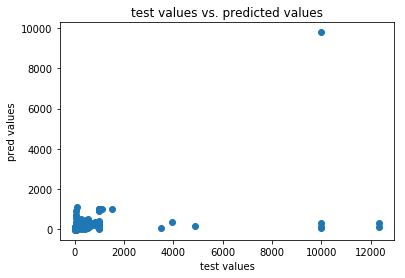

In [215]:
plt.scatter(y_test,preds_test)
plt.xlabel('test values')
plt.ylabel('pred values')
plt.title('test values vs. predicted values');

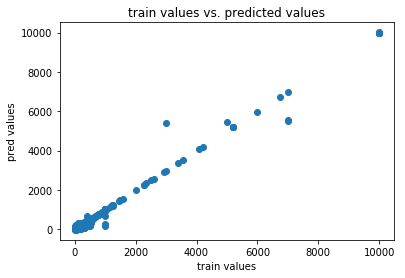

In [216]:
plt.scatter(y_train,preds_train)
plt.xlabel('train values')
plt.ylabel('pred values')
plt.title('train values vs. predicted values');

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


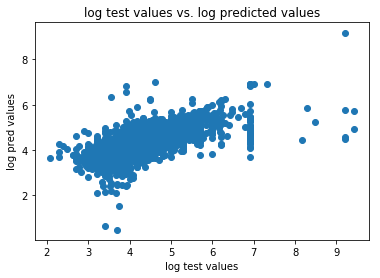

In [219]:
plt.scatter(np.log(y_test),np.log(preds_test))
plt.xlabel('log test values')
plt.ylabel('log pred values')
plt.title('log test values vs. log predicted values');

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


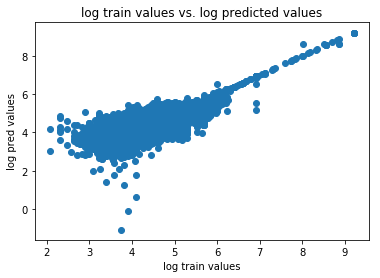

In [220]:
plt.scatter(np.log(y_train),np.log(preds_train))
plt.xlabel('log train values')
plt.ylabel('log pred values')
plt.title('log train values vs. log predicted values');

In [222]:
ln_y_train=np.log(y_train)
ln_y_test=np.log(y_test)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [239]:
ln_y_train[y_train==0]=0
ln_y_test[y_test==0]=0

In [240]:
rcv.fit(X_train_final,ln_y_train)
rcv.score(X_train_final,ln_y_train),rcv.score(X_test_final,ln_y_test)

(0.7187153895447553, 0.492076628169389)

In [241]:
lcv.fit(X_train_final,ln_y_train)
lcv.score(X_train_final,ln_y_train),lcv.score(X_test_final,ln_y_test)

/Users/shanelljones/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


(0.7186137053237298, 0.49041753812049593)

In [278]:
new_value_coefs_final=[(col,val) for col, val in zip(lcv.coef_, final_cols_postive)]
new_value_coefs_final=pd.DataFrame(new_value_coefs_final)
new_value_coefs_final.rename(columns={0:'coefs',1:'col_name'},inplace=True)
new_value_coefs_final.sort_values(by='coefs',ascending=False).head()

,coefs,col_name
4,0.182918,accommodates
6,0.081695,bedrooms
261,0.070094,zipcode_EH1 1JR
264,0.068206,zipcode_EH1 2JA
309,0.058972,zipcode_EH7 5FL


In [246]:
preds_final=lcv.predict(X_test_final)
preds_final_train=lcv.predict(X_train_final)

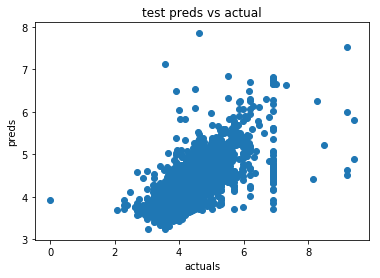

In [247]:
plt.scatter(ln_y_test,preds_final);
plt.xlabel('actuals')
plt.ylabel('preds')
plt.title('test preds vs actual');

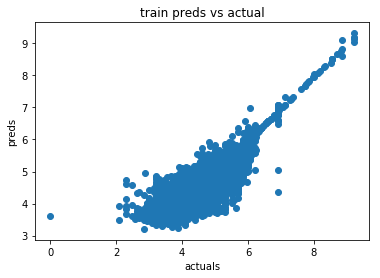

In [273]:
plt.scatter(ln_y_train,preds_final_train)
plt.xlabel('actuals')
plt.ylabel('preds')
plt.title('train preds vs actual');

The model current has been heveavily penalized for vairance,but has become significantly better in test. We have gone from less than a 20% test score to approximately a 50% test score. When looking at some of the kept variables the most important are the number of people, bedrooms and specific areas of town. This would indicate other avenues that can be explored. When looking at the data, there is some hetreostocatcy but not nearly as bad as before. A clear pattern can now be seen in the data. When looking for further improvements that can be made, interaction variables can be tested at a later date. This will add more linear behavior to some of the variables that will allow them to have more predictive power.